# QCNN demo

In [2]:
from qcnn import QuantumCNN
from qibo import gates
import random
import numpy as np

import qibo
qibo.set_backend("numpy")

[Qibo 0.1.8|INFO|2023-02-13 12:29:39]: Using numpy backend on /CPU:0


## load data ##

In [3]:
data = np.load('nqubits_4_data.npy')
labels = np.load('nqubits_4_labels.npy')
#data = np.load('nqubits_4_data_shuffled.npy')
#labels = np.load('nqubits_4_labels_shuffled.npy')
labels = np.transpose(np.array([labels])) # restructure to required array format

In [4]:
data[-2:]

array([[ 0.41104983+0.j,  0.23196256+0.j,  0.23196256+0.j,
         0.21691558+0.j,  0.23196256+0.j,  0.14733222+0.j,
         0.21691558+0.j,  0.23196256+0.j,  0.23196256+0.j,
         0.21691558+0.j,  0.14733222+0.j,  0.23196256+0.j,
         0.21691558+0.j,  0.23196256+0.j,  0.23196256+0.j,
         0.41104983+0.j],
       [-0.41009532+0.j, -0.23215913+0.j, -0.23215913+0.j,
        -0.21725079+0.j, -0.23215913+0.j, -0.14776521+0.j,
        -0.21725079+0.j, -0.23215913+0.j, -0.23215913+0.j,
        -0.21725079+0.j, -0.14776521+0.j, -0.23215913+0.j,
        -0.21725079+0.j, -0.23215913+0.j, -0.23215913+0.j,
        -0.41009532+0.j]])

In [5]:
labels[-2:]

array([[1.],
       [1.]])

In [6]:
test = QuantumCNN(nqubits=4, nlayers=1, nclasses=2)
testcircuit = test._circuit
testcircuit.draw()

'q0:     ─RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ──────────────────────────────────────── ...\nq1:     ─RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─────────────RX─RY─RZ──────────RZZ─RYY─R ...\nq2:     ──────────────────────RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─RX─RY─RZ─RZZ─RYY─R ...\nq3:     ──────────────────────RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─────────────────── ...\n\nq0: ... ───RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─RX─RY─RZ─o───────────────────────\nq1: ... XX─RX─RY─RZ─|───|───|─────────────────────|─RX─RY─RZ─o────────────\nq2: ... XX─RX─RY─RZ─|───|───|───RX─RY─RZ──────────X─RZ─RY─RX─|────────────\nq3: ... ───RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ────────────RX─RY─RZ─X─RZ─RY─RX─M─'

In [ ]:
testbias = np.zeros(test.measured_qubits)
testangles = [random.uniform(0,2*np.pi) for i in range(21*2)]
init_theta = np.concatenate((testbias, testangles))
result = test.minimize(init_theta, data=data, labels=labels, nshots=10000, method='Powell')
print(result)

In [9]:
predictions = []
for n in range(len(data)):
    predictions.append(test.Predictions(testcircuit, results_save[1], data[n], nshots=10000)[0])

Text(0, 0.5, 'prediction')

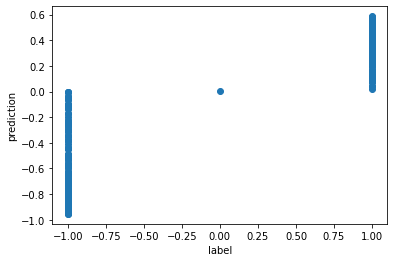

In [119]:
import matplotlib.pyplot as plt
plt.scatter(labels.reshape(len(labels)),predictions)
plt.xlabel('label')
plt.ylabel('prediction')

In [120]:
test.Accuracy(labels,predictions)

0.995